# Regressão Linear

### Importar pandas e matplotlib

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

### Criar um Data Frame de faturamento mensal de 12 meses

In [3]:
faturamento = [25,38,29,115,82,114,120,160,153,190,239,175]

In [6]:
mes = list(range(1,13))

In [7]:
data_dict = {'mes': mes, 'faturamento': faturamento}

In [9]:
data = pd.DataFrame.from_dict(data_dict)

In [10]:
data

,mes,faturamento
0,1,25
1,2,38
2,3,29
3,4,115
4,5,82
5,6,114
6,7,120
7,8,160
8,9,153
9,10,190


### Visualizar dados em Gráfico de Dispersão

In [11]:
x = data['mes']
y = data['faturamento']

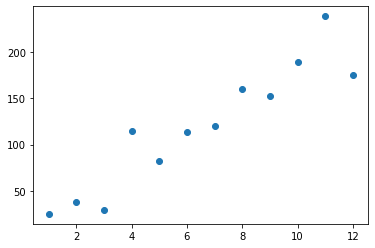

In [12]:
plt.scatter(x,y)

In [13]:
data[['mes', 'faturamento']].corr()

,mes,faturamento
mes,1.000000,0.935045
faturamento,0.935045,1.000000


## Criar Modelo Preditivo aplicando fórmulas (manualmente)

<center><strong>Equação da Regressão Linear</strong></center><br>
Essa é a equação para desenhar uma reta. Mas quando usamos essa equação para criar uma Regressão Linear especificamente, colocamos o acento circunflexo no $\hat{y}$.

$$\hat{y} = mx + b$$

<strong>m</strong> = inclinação da linha<br>
<strong>b</strong> = interceptação do y<br>
<strong>(x,y)</strong> = pontos coordenados<br>

$$m = \frac {n\sum {xy}-\sum x \sum y}{n\sum x^2-(\sum x)^2}$$<br>

$$b = \frac {\sum y-m\sum x}{n}$$

# m

In [14]:
x.sum()

78

In [15]:
y.sum()

1440

In [16]:
x*y

0       25
1       76
2       87
3      460
4      410
5      684
6      840
7     1280
8     1377
9     1900
10    2629
11    2100
dtype: int64

In [17]:
x**2

0       1
1       4
2       9
3      16
4      25
5      36
6      49
7      64
8      81
9     100
10    121
11    144
Name: mes, dtype: int64

In [18]:
(x*y).sum()

11868

In [19]:
(x**2).sum()

650

In [21]:
len(y)

12

In [23]:
(x.sum())**2

6084

$$m = \frac {n\sum {xy}-\sum x \sum y}{n\sum x^2-(\sum x)^2}$$<br>

In [26]:
m = (len(y) * (x*y).sum() - x.sum()*y.sum())/(len(y) * (x**2).sum() - (x.sum())**2)

In [28]:
m.round(4)

17.5385

# b

$$b = \frac {\sum y-m\sum x}{n}$$

In [30]:
b = (y.sum() - m * x.sum())/len(y)

In [31]:
b.round()

6.0

### Modelo Preditivo
Criar modelo preditivo para prever (ou estimar) o rendimento de qualquer mês

$$\hat{y} = mx + b$$

In [32]:
xpred = 24

In [33]:
ypred = m*xpred + b

In [35]:
ypred # faturamento no mês 24

426.92307692307696

### Predições para os 12 meses
Criar uma lista contendo as predições para cada um dos 12 meses

In [36]:
pred_manual = []
for elemento in x:
    ypred = m*elemento+b
    pred_manual.append(ypred)

In [37]:
pred_manual

[23.538461538461522,
 41.07692307692306,
 58.6153846153846,
 76.15384615384615,
 93.6923076923077,
 111.23076923076923,
 128.76923076923075,
 146.3076923076923,
 163.84615384615384,
 181.3846153846154,
 198.9230769230769,
 216.46153846153845]

## Inserir predições no DataFrame

In [40]:
data['predições'] = pred_manual

In [41]:
data

,mes,faturamento,predições
0,1,25,23.538462
1,2,38,41.076923
2,3,29,58.615385
3,4,115,76.153846
4,5,82,93.692308
5,6,114,111.230769
6,7,120,128.769231
7,8,160,146.307692
8,9,153,163.846154
9,10,190,181.384615


### Visualizar Regressão Linear

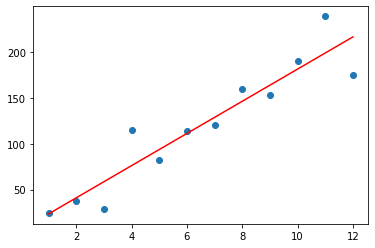

In [43]:
plt.scatter(x,y)
plt.plot(x,data['predições'],color='red')

# Coeficiente de Determinação - R-quadrado ($R²$)

$$R^2 = 1 - \frac {SQ_{res}} {SQ_{tot}} = 1 - \frac {\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \overline y)^2} $$

### Calcular Soma Quadrática dos Resíduos (SQres)

In [44]:
data['predições']

0      23.538462
1      41.076923
2      58.615385
3      76.153846
4      93.692308
5     111.230769
6     128.769231
7     146.307692
8     163.846154
9     181.384615
10    198.923077
11    216.461538
Name: predições, dtype: float64

In [45]:
data['faturamento']

0      25
1      38
2      29
3     115
4      82
5     114
6     120
7     160
8     153
9     190
10    239
11    175
Name: faturamento, dtype: int64

In [48]:
data['residuos'] = y-pred_manual

In [49]:
data

,mes,faturamento,predições,residuos
0,1,25,23.538462,1.461538
1,2,38,41.076923,-3.076923
2,3,29,58.615385,-29.615385
3,4,115,76.153846,38.846154
4,5,82,93.692308,-11.692308
5,6,114,111.230769,2.769231
6,7,120,128.769231,-8.769231
7,8,160,146.307692,13.692308
8,9,153,163.846154,-10.846154
9,10,190,181.384615,8.615385


In [52]:
SQres = (data['residuos']**2).sum()
SQres

6323.538461538462

### Calcular Soma Quadrática Total (SQtot)

In [53]:
media = data['faturamento'].mean()
media

120.0

In [54]:
data['faturamento medio'] = media

In [56]:
SQtot = ((data['faturamento'] - data['faturamento medio'])**2).sum()
SQtot

50310.0

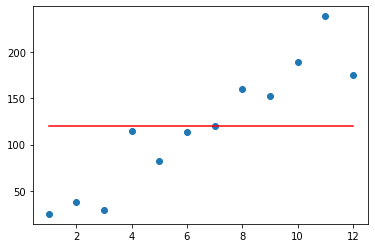

In [57]:
plt.scatter(x,y)
plt.plot(x,data['faturamento medio'],color='red')

### Calcular R-quadrado

In [59]:
r_quadrado = 1-SQres/SQtot

In [61]:
r_quadrado.round(4)

0.8743

# RMSE
Raiz do Erro Quadrático Médio

$ e = y_i - \hat{y_i} $ <br>

$ RMSE = \sqrt {\sum \frac {e^2}{n}}$<br>



In [62]:
(data['residuos']**2).sum()

6323.538461538462

In [63]:
SQres

6323.538461538462

### Importar numpy

In [67]:
import numpy as np

In [68]:
rmse = np.sqrt(SQres/len(data))

In [69]:
rmse.round(4)

22.9556

# Regra Empírica 68-95-99.7

In [71]:
um_acima = pred_manual+rmse # desvio padrão acima da média
um_abaixo = pred_manual-rmse # desvio padrão abaixo da média

In [72]:
dois_acima = pred_manual+2*rmse # desvio padrão acima da média
dois_abaixo = pred_manual-2*rmse # desvio padrão abaixo da média

In [73]:
tres_acima = pred_manual+3*rmse # desvio padrão acima da média
tres_abaixo = pred_manual-3*rmse # desvio padrão abaixo da média

# Um desvio padrão 68% 

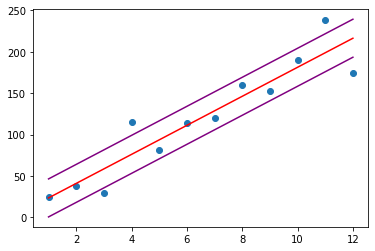

In [75]:
plt.scatter(x,y)
plt.plot(x,pred_manual,color='red')
plt.plot(x,um_acima,color='purple')
plt.plot(x,um_abaixo,color='purple')

# Dois desvios padrões 95%

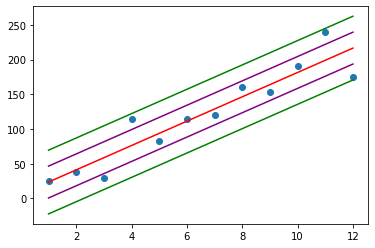

In [77]:
plt.scatter(x,y)
plt.plot(x,pred_manual,color='red')
plt.plot(x,um_acima,color='purple')
plt.plot(x,um_abaixo,color='purple')
plt.plot(x,dois_acima,color='green')
plt.plot(x,dois_abaixo,color='green')

# Três desvios padrões 99.7%

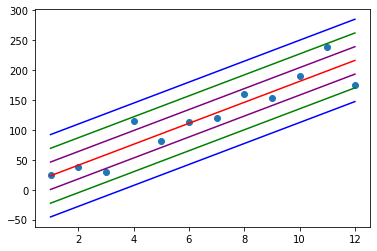

In [78]:
plt.scatter(x,y)
plt.plot(x,pred_manual,color='red')
plt.plot(x,um_acima,color='purple')
plt.plot(x,um_abaixo,color='purple')
plt.plot(x,dois_acima,color='green')
plt.plot(x,dois_abaixo,color='green')
plt.plot(x,tres_acima,color='blue')
plt.plot(x,tres_abaixo,color='blue')

# Regressão Linear - Statsmodels

### Importar Statsmodels 

In [84]:
import statsmodels.api as sm

### Definir x e y

In [85]:
x = data['mes']
y = data['faturamento']

### Adicionar constante

In [86]:
x = sm.add_constant(x.values)

In [87]:
x

array([[ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  4.],
       [ 1.,  5.],
       [ 1.,  6.],
       [ 1.,  7.],
       [ 1.,  8.],
       [ 1.,  9.],
       [ 1., 10.],
       [ 1., 11.],
       [ 1., 12.]])

### Treinar Modelo

In [88]:
modelo = sm.OLS(y,x).fit()

### Gerar predição

In [90]:
sm_pred = modelo.predict()

In [91]:
sm_pred

array([ 23.53846154,  41.07692308,  58.61538462,  76.15384615,
        93.69230769, 111.23076923, 128.76923077, 146.30769231,
       163.84615385, 181.38461538, 198.92307692, 216.46153846])

### Verificar parâmetros de performance do Modelo Preditivo

In [92]:
modelo.summary()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            faturamento   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     69.56
Date:                Thu, 17 Mar 2022   Prob (F-statistic):           8.16e-06
Time:                        20:52:32   Log-Likelihood:                -54.630
No. Observations:                  12   AIC:                             113.3
Df Residuals:                      10   BIC:                             114.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0000     15.477      0.388      0.706     -28.484      40.484
x1            17.5385      2.103      8.340      0.000      12.853      22.224
==============================================================================
Omnibus:                        0.197   Durbin-Watson:                   2.757
Prob(Omnibus):                  0.906   Jarque-Bera (JB):                0.142
Skew:                           0.175   Prob(JB):                        0.932
Kurtosis:                       2.599   Cond. No.                         15.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### RMSE

In [93]:
from statsmodels.tools.eval_measures import rmse

In [96]:
rmse(y,sm_pred).round(4)

22.9556

# Regressão Linear - Sklearn

### Importar sklearn

In [97]:
from sklearn import linear_model

### Instanciar Modelo de Regressão Linear

In [98]:
lm = linear_model.LinearRegression()

### Reshape x (remodelar x)
Se X não possuir múltiplas variáveis, sklearn solicita que modifiquemos o formato

In [99]:
x = data['mes']
y = data['faturamento']

In [101]:
x = np.array(x).reshape(-1,1)

### Treinar Modelo

In [102]:
sk_modelo = lm.fit(x,y)

### Gerar predições

In [103]:
skpred = sk_modelo.predict(x)

In [105]:
xpred = np.array([15]).reshape(-1,1) # exemplo

In [106]:
sk_modelo.predict(xpred)

array([269.07692308])

In [107]:
skpred

array([ 23.53846154,  41.07692308,  58.61538462,  76.15384615,
        93.69230769, 111.23076923, 128.76923077, 146.30769231,
       163.84615385, 181.38461538, 198.92307692, 216.46153846])

### $R^2$

In [108]:
lm.score(x,y)

0.8743085179578918

### m

In [109]:
lm.coef_

array([17.53846154])

### b

In [110]:
lm.intercept_

6.000000000000014

### RMSE

In [112]:
from sklearn.metrics import mean_squared_error

In [113]:
mse = mean_squared_error(y,skpred)

In [114]:
mse

526.9615384615386

In [115]:
np.sqrt(mse)

22.95564284574794

# Todas Predições

### Calculado Manualmente

In [116]:
np.array(pred_manual)

array([ 23.53846154,  41.07692308,  58.61538462,  76.15384615,
        93.69230769, 111.23076923, 128.76923077, 146.30769231,
       163.84615385, 181.38461538, 198.92307692, 216.46153846])

### Calculado via Statsmodel

In [117]:
sm_pred

array([ 23.53846154,  41.07692308,  58.61538462,  76.15384615,
        93.69230769, 111.23076923, 128.76923077, 146.30769231,
       163.84615385, 181.38461538, 198.92307692, 216.46153846])

### Calculado via Sklearn

In [118]:
skpred

array([ 23.53846154,  41.07692308,  58.61538462,  76.15384615,
        93.69230769, 111.23076923, 128.76923077, 146.30769231,
       163.84615385, 181.38461538, 198.92307692, 216.46153846])